In [375]:
import tarfile
import os
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import joblib

from scipy import stats

In [ ]:
os.getcwd()

In [ ]:
os.chdir('/home/kavads/self_study/HOML/self')

In [ ]:
os.getcwd()

In [ ]:
url_root = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/'
data_name = 'housing'
file = 'housing.tgz'

In [ ]:
data_url = os.path.join(url_root, data_name, file)
housing_path = os.path.join('datasets',data_name)
#os.makedirs(housing_path)

In [ ]:
#define function to fetch data sets from HOML2 github repo
def fetch_data(data_url, dest):
    tgz_path = os.path.join(dest, file)
    urllib.request.urlretrieve(data_url, tgz_path)
    tgz_file = tarfile.open(tgz_path)
    tgz_file.extractall(path=dest)
    tgz_file.close()
    

In [ ]:
fetch_data(data_url, housing_path)

In [179]:
df = pd.read_csv(housing_path+'/housing.csv')

In [180]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [181]:
df.shape

(20640, 10)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [183]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [184]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

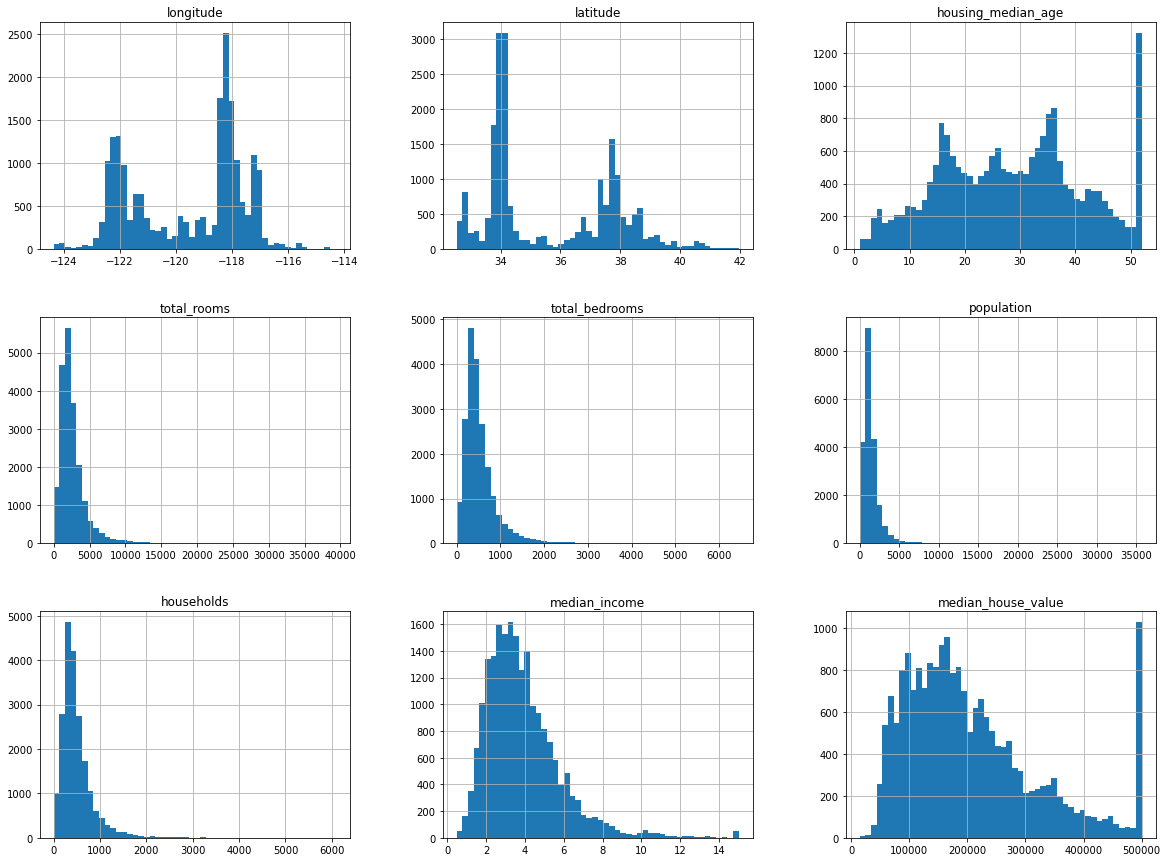

In [185]:
df.hist(bins=50,figsize=(20,15))

In [186]:
#creating a test set
def split_train_test(X, Y, test_ratio):
    n_rows = len(Y.index)
    nums = np.random.random(n_rows)
    select = np.where(nums>test_ratio,True,False)
    X_train = X[select]
    Y_train = Y[select]
    X_test = X[~select]
    Y_test = Y[~select]  
    return X_train, Y_train, X_test, Y_test

In [187]:
X = df.iloc[:,np.r_[:8,9]]
Y = df.iloc[:,8]

In [188]:
X_train, Y_train, X_test, Y_test = split_train_test(X,Y,0.2)

In [189]:
rng = np.random.default_rng(seed=42)
print(rng)


Generator(PCG64)


In [190]:
nums = rng.random()
nums

0.7739560485559633

In [191]:
rints = rng.integers(low=0, high = len(df.index)+1, size = len(df.index))

In [192]:
rints

array([13511,  9058,  8937, ...,  8615, 18580, 16663])

In [193]:
np.random.seed(42)
np.random.random(10)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [194]:
np.random.normal(10,1,100)

array([ 9.53052561, 10.54256004,  9.53658231,  9.53427025, 10.24196227,
        8.08671976,  8.27508217,  9.43771247,  8.98716888, 10.31424733,
        9.09197592,  8.5876963 , 11.46564877,  9.7742237 , 10.0675282 ,
        8.57525181,  9.45561728, 10.11092259,  8.84900642, 10.37569802,
        9.39936131,  9.70830625,  9.39829339, 11.85227818,  9.98650278,
        8.94228907, 10.82254491,  8.77915635, 10.2088636 ,  8.04032988,
        8.67181395, 10.19686124, 10.73846658, 10.17136828,  9.88435172,
        9.6988963 ,  8.52147801,  9.28015579,  9.53936123, 11.05712223,
       10.34361829,  8.23695984, 10.32408397,  9.61491772,  9.323078  ,
       10.61167629, 11.03099952, 10.93128012,  9.16078248,  9.69078762,
       10.33126343, 10.97554513,  9.52082576,  9.81434102,  8.89366503,
        8.80379338, 10.81252582, 11.35624003,  9.92798988, 11.0035329 ,
       10.36163603,  9.35488025, 10.36139561, 11.53803657,  9.96417396,
       11.56464366,  7.3802549 , 10.8219025 , 10.08704707,  9.70

In [195]:
np.random.randint(0,100,100)

array([61, 57, 51, 11, 38,  1,  2, 55, 80, 58,  1,  1, 91, 53, 86, 95, 96,
        0, 18,  1, 52, 43, 89, 31, 69, 31, 67, 54, 74, 55, 16, 37, 23, 68,
       97, 69, 85, 10, 15, 96, 72, 58, 69, 79, 92,  2, 19, 58, 35, 18, 89,
       66, 18, 19, 95, 70, 51, 32, 39, 38, 81,  0, 10, 91, 56, 88, 49, 22,
       30, 93, 41, 98,  6, 15, 89, 59,  1,  0, 47, 11, 68, 36, 31,  8, 98,
       18, 47, 79,  2, 19, 23, 53, 32, 23, 74, 71, 35, 37, 83, 98])

In [196]:
#using scikit learn
#from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [197]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


In [198]:
#Stratified random sampling
#Start with discretizayion of the variable
df['income_cat'] = pd.cut(df['median_income'], 
                         bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                         labels = [1,2,3,4,5])


In [199]:
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [200]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(df, df['income_cat']):
    stf_train_set = df.loc[train_idx]
    stf_test_set = df.loc[test_idx]

In [201]:
print(split.split(df, df['income_cat']))

<generator object BaseShuffleSplit.split at 0x7f0f1962f270>


In [202]:
#this is a tuple of dataframes
for set_ in (stf_train_set, stf_test_set):
    set_.drop('income_cat', axis=1, inplace=True)
    

In [203]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

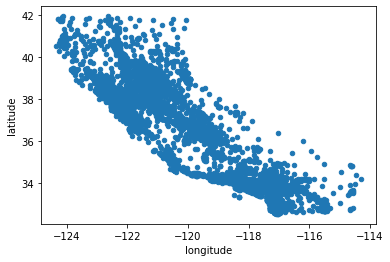

In [204]:
df.plot(kind='scatter', x='longitude', y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

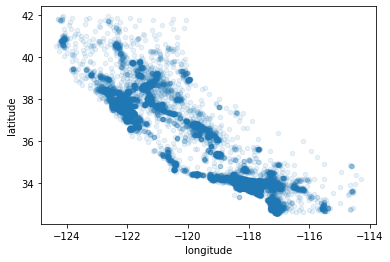

In [205]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

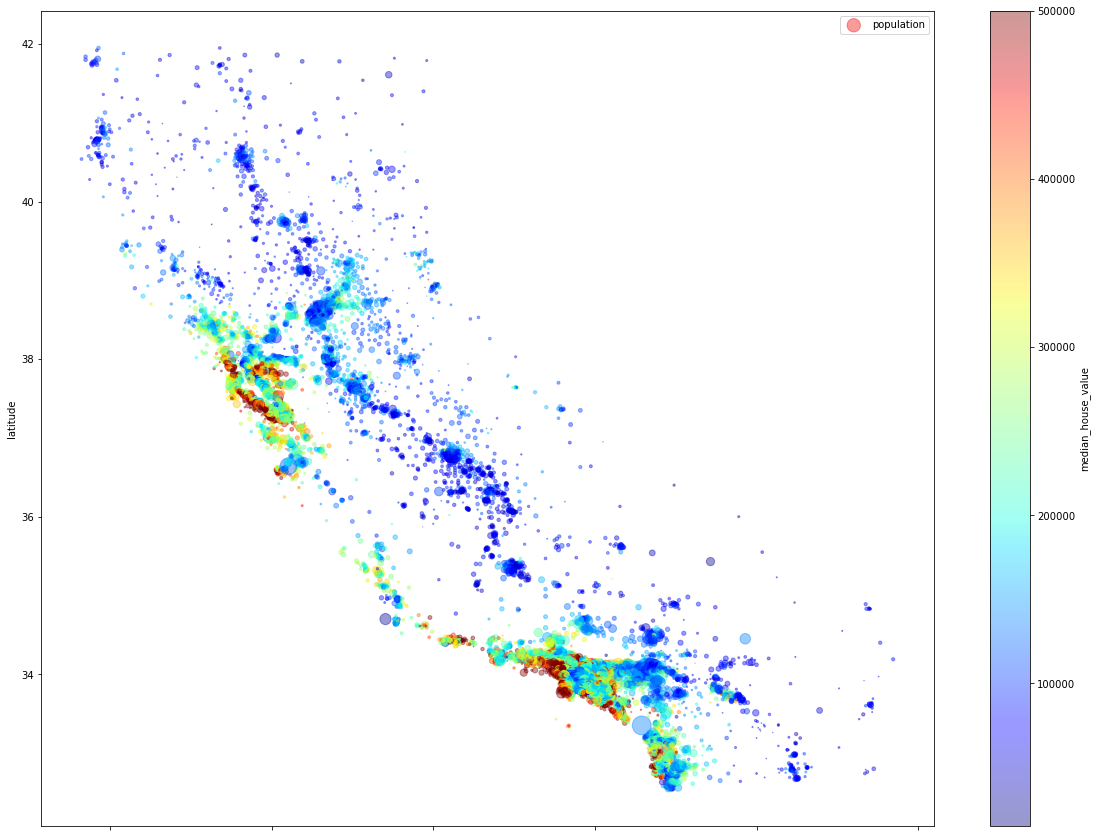

In [206]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
       s=df['population']/100, label = 'population', figsize=(20,15),
       c='median_house_value', cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

In [207]:
correlation_matrix = df.corr()

In [208]:
correlation_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [209]:
#correlation just signals the strength of the LINEAR relationship
#it does not give a sense of the SLOPE of the linear relation ship

#SCATTER MATRIX to visualize correlations between numerical attributes

from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

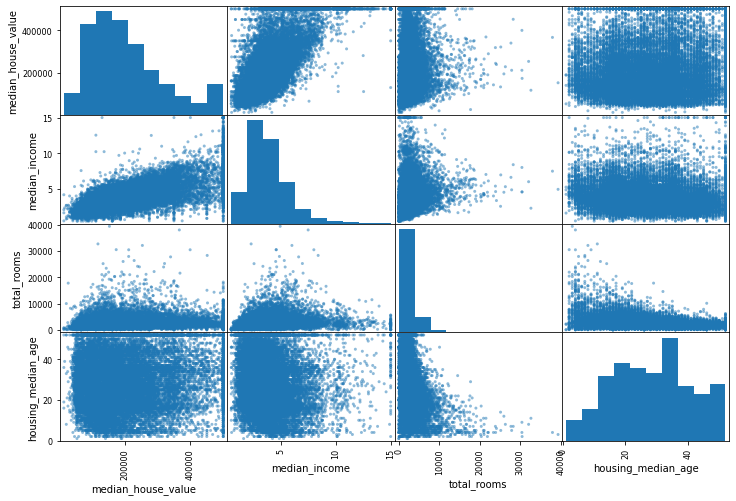

In [210]:
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(df[attributes], figsize=(12,8))

In [211]:
#Experimenting with attribute combinations
#Just like the derived variables in the AxcessFinancial project

#rooms_per_household = total_rooms/Total_households
#bedrooms_per_room = # of bedrooms/# of rooms
#population per household = population/# of households

df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']

In [212]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [213]:
new_attributes = attributes + ['rooms_per_household', 'bedrooms_per_room', 'population_per_household']

In [214]:
df[new_attributes].corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
population_per_household   -0.023737
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [215]:
#scatter_matrix(df[new_attributes], figsize=(20,15))

In [217]:
#Data Preparation for ML ALgorithms
housing = stf_train_set.drop('median_house_value', axis=1)
housing_labels = stf_train_set['median_house_value'].copy()


In [218]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [228]:
#Handling missing values
#1. Getting rid of the records with missing values
housing2 = housing.copy()
housing2.dropna(subset=['total_bedrooms'], how='any', inplace=True)

#2. Getting rid of the entire attribute
housing3 = housing.copy()
housing3.drop('total_bedrooms', axis=1, inplace=True)

#3. Filling missing values using population estimates
housing4 = housing.copy()
median_bedrooms = housing['total_bedrooms'].median()
housing4['total_bedrooms'].fillna(median_bedrooms, inplace=True)

In [229]:
housing2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16354 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16354 non-null  float64
 1   latitude            16354 non-null  float64
 2   housing_median_age  16354 non-null  float64
 3   total_rooms         16354 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16354 non-null  float64
 6   households          16354 non-null  float64
 7   median_income       16354 non-null  float64
 8   ocean_proximity     16354 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [230]:
housing3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   population          16512 non-null  float64
 5   households          16512 non-null  float64
 6   median_income       16512 non-null  float64
 7   ocean_proximity     16512 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.1+ MB


In [231]:
housing4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [232]:
housing4.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,533.939438,1419.687379,497.011810,3.875884
std,2.001828,2.137963,12.574819,2138.417080,410.806260,1115.663036,375.696156,1.904931
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566950
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.000000,602.000000,4.745325
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [233]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [234]:
#better way to fill missing values for total bedrooms
housing5 = housing.copy()
housing5['bedrooms_per_household'] = housing5['total_bedrooms']/housing5['households']
median_bedrooms_per_household = housing5['bedrooms_per_household'].median()
housing5['bedrooms_per_household'].fillna(median_bedrooms_per_household, inplace=True)
housing5['total_bedrooms'].fillna(housing5['bedrooms_per_household']*housing5['households'], inplace=True)

In [235]:
housing5.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.847914,1419.687379,497.011810,3.875884,1.098383
std,2.001828,2.137963,12.574819,2138.417080,412.725231,1115.663036,375.696156,1.904931,0.506962
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,0.333333
25%,-121.800000,33.940000,18.000000,1443.000000,294.000000,784.000000,279.000000,2.566950,1.006289
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,1.048780
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,1.098495
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,34.066667


In [242]:
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)


In [243]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [246]:
imputer.statistics_.tolist()

[-118.51, 34.26, 29.0, 2119.0, 433.0, 1164.0, 408.0, 3.54155]

In [245]:
housing_num.median()

longitude             -118.51000
latitude                34.26000
housing_median_age      29.00000
total_rooms           2119.00000
total_bedrooms         433.00000
population            1164.00000
households             408.00000
median_income            3.54155
dtype: float64

In [247]:
X = imputer.transform(housing_num)
#output is a plain NumPy array

In [251]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index=housing_num.index)


In [252]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [253]:
#Sklearn design
#Estimators: fit(df), transform(df), fit_transform(df), predict(df_test), score(y_test_labs)
#all estimator's hyperparameters are available (Ex: imputer.strategy) and estimates are also available, generally ending with an underscore(imputer.statistics_)
#Data sets are represented as NumPy arrays or SciPy sparse matrices


In [254]:
housing_cat = housing[['ocean_proximity']]

In [255]:
type(housing_cat)


pandas.core.frame.DataFrame

In [259]:
type(housing['ocean_proximity'])

pandas.core.series.Series

In [260]:
ordinal_encoder = OrdinalEncoder()
one_hot_encoder = OneHotEncoder()

In [264]:
housing_cat_ord_encodes = ordinal_encoder.fit_transform(housing_cat)
type(housing_cat_ord_encodes)

numpy.ndarray

In [262]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [274]:
housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat)

In [276]:
housing_cat_1hot = pd.DataFrame(housing_cat_1hot.toarray(), columns=one_hot_encoder.categories_, index=housing_cat.index)

In [277]:
housing_cat_1hot

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,0.0,1.0,0.0,0.0,0.0
15502,0.0,0.0,0.0,0.0,1.0
2908,0.0,1.0,0.0,0.0,0.0
14053,0.0,0.0,0.0,0.0,1.0
20496,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
15174,1.0,0.0,0.0,0.0,0.0
12661,0.0,1.0,0.0,0.0,0.0
19263,1.0,0.0,0.0,0.0,0.0
19140,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Revisit custom transformers after revising Python Classes- OOO


In [280]:
#Scaling
#Min-max scaler (Normalization) - bounded
#Standardization - unbounded, but robust to outliers


In [289]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    #('attribs_adder', CombinedAttributesAdder()),
    ('scaler', StandardScaler())
])

#All the elements but the last in the pipeline need to be transformers, need to have a fit_transform() method
#The pipeline exposes the same methods as the last estimator


In [290]:
num_attribs = list(housing_num)
#returns a list of column names

In [291]:
cat_attribs = ['ocean_proximity']

In [294]:
full_pipeline = ColumnTransformer([ \
                                   ('num', num_pipeline, num_attribs), \
                                   ('cat', OneHotEncoder(), cat_attribs),
])

In [314]:
housing_prepared = full_pipeline.fit_transform(housing)

In [315]:
housing_prepared.shape

(16512, 13)

In [316]:
#pd.DataFrame(housing_prepared, columns = df.columns[:8].tolist()+df['ocean_proximity'].value_counts().index.tolist())
#How do we get column names for the output?

In [317]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [318]:
housing_predictions = lin_reg.predict(housing_prepared)

In [323]:
lin_reg_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_reg_mse)
lin_rmse

69050.56219504568

In [325]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [326]:
tree_predictions = tree_reg.predict(housing_prepared)

In [328]:
dtree_mse = mean_squared_error(housing_labels, tree_predictions)
dtree_rmse = np.sqrt(dtree_mse)
dtree_rmse

0.0

In [332]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([70753.32082171, 68740.50514613, 64889.72680339, 69076.71705025,
       69022.94355626, 69084.62461368, 72917.99076461, 69609.45215001,
       67591.01105688, 71396.06582343])

In [335]:
tree_rmse_scores.mean()


69308.2357786354

In [336]:
tree_rmse_scores.std()

2062.710894577828

In [345]:
def display_scores(scores):
    print("The Cross validation score are: \n ", scores, '\n')
    print("The mean score is: ", scores.mean())
    print("The standard deviation of the scores is: ", scores.std())

In [346]:
lin_scores = cross_val_score(LinearRegression(), housing_prepared,
                              housing_labels, scoring='neg_mean_squared_error',
                             cv=10)

In [347]:
display_scores(lin_scores)

The Cross validation score are: 
  [-5.21703345e+09 -4.26647039e+09 -4.58415607e+09 -4.81199398e+09
 -4.45791383e+09 -5.32954791e+09 -4.97338692e+09 -4.82202178e+09
 -4.47966900e+09 -5.00645674e+09] 

The mean score is:  -4794865007.8087435
The standard deviation of the scores is:  328369880.57612866


In [350]:
rf_scores = cross_val_score(RandomForestRegressor(), housing_prepared, housing_labels,
                           scoring = 'neg_mean_squared_error', cv=10)

display_scores(rf_scores)

The Cross validation score are: 
  [-2.55468241e+09 -2.39593299e+09 -2.12123436e+09 -2.56519554e+09
 -2.25457191e+09 -2.45500002e+09 -2.67485266e+09 -2.36668923e+09
 -2.23388096e+09 -2.83145780e+09] 

The mean score is:  -2445349788.163789
The standard deviation of the scores is:  205659011.37990853


In [353]:
#saving the ML model in a pickle file

#joblib.dump(my_model, 'my_model.pkl')

# later...

#my_model_loaded = joblib.load('my_model_pkl')



In [355]:
#Hyper parameter tuning
#GridSearchCV and RandomizedSearchCV

param_grid = [{'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
             {'bootstrap':[False],'n_estimators':[3,10], 'max_features':[2,3,4]}]

forest_reg = RandomForestRegressor()

In [356]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error', return_train_score=True)

In [357]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [359]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [360]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [362]:
cv_results = grid_search.cv_results_

In [363]:
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(np.sqrt(-mean_score), params)

63885.09258583179 {'max_features': 2, 'n_estimators': 3}
55468.71310494809 {'max_features': 2, 'n_estimators': 10}
52511.537962945724 {'max_features': 2, 'n_estimators': 30}
59866.256199530486 {'max_features': 4, 'n_estimators': 3}
52963.512642929716 {'max_features': 4, 'n_estimators': 10}
50535.607932686384 {'max_features': 4, 'n_estimators': 30}
59289.84606732121 {'max_features': 6, 'n_estimators': 3}
51767.46392190456 {'max_features': 6, 'n_estimators': 10}
50021.71617791899 {'max_features': 6, 'n_estimators': 30}
59036.04059167493 {'max_features': 8, 'n_estimators': 3}
51867.10650751251 {'max_features': 8, 'n_estimators': 10}
50107.08117861279 {'max_features': 8, 'n_estimators': 30}
61839.71949066084 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54077.37676502082 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59570.60668249947 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52323.198521788836 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [364]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [365]:
cat_encoder = full_pipeline.named_transformers_['cat']
cat_1hot_attribs = cat_encoder.categories_[0].tolist()

In [366]:
attribs = num_attribs + cat_1hot_attribs

In [367]:
sorted(zip(feature_importances, attribs), reverse=True)

[(0.40707814366024364, 'median_income'),
 (0.14219005601078832, 'INLAND'),
 (0.12585044610772295, 'longitude'),
 (0.10920832209053655, 'latitude'),
 (0.04597453328809144, 'housing_median_age'),
 (0.043649692884178956, 'population'),
 (0.03519221944448666, 'total_rooms'),
 (0.02988208539052593, 'total_bedrooms'),
 (0.027729817122737914, 'households'),
 (0.021094909584262755, '<1H OCEAN'),
 (0.009043425923107086, 'NEAR OCEAN'),
 (0.003079417227742704, 'NEAR BAY'),
 (2.6931265574917885e-05, 'ISLAND')]

In [369]:
final_model = grid_search.best_estimator_

X_test = stf_test_set.drop('median_house_value', axis=1)
Y_test = stf_test_set['median_house_value'].copy()

In [370]:
X_test_prepared = full_pipeline.transform(X_test)

In [372]:
Y_predicted = final_model.predict(X_test_prepared)

In [374]:
test_rmse = np.sqrt(mean_squared_error(Y_test, Y_predicted))
test_rmse

47720.547031633476

In [379]:
confidence = 0.95
squared_errors = (Y_predicted - Y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale = stats.sem(squared_errors)))

array([45761.98630283, 49601.83290582])

In [380]:
joblib.dump(final_model, 'my_final_model.pkl')

['my_final_model.pkl']

In [381]:
reloaded = joblib.load('my_final_model.pkl')

In [382]:
type(reloaded)

sklearn.ensemble._forest.RandomForestRegressor